In [2]:
!pip install easyocr

     |████████████████████████████████| 63.0 MB 7.0 MB/s eta 0:00:01
  Using cached scikit_image-0.17.2-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached tifffile-2020.9.3-py3-none-any.whl (148 kB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached PyWavelets-1.1.1-cp36-cp36m-manylinux1_x86_64.whl (4.4 MB)


Using CPU. Note: This module is much faster with a GPU.
  0%|                                                                                                                                           | 0/31 [00:00<?, ?it/s]

working on C:/Users/Raja/Downloads/Jaipur_SHOP_JSONS/ dir ...
4 shop_hoarding


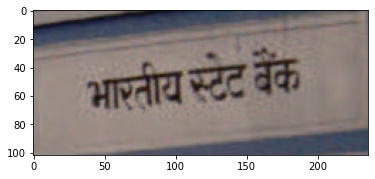

['भार्ताय स्टेंट नेंक']
Distance 8130.664978954674
1488 9216 360 12.6786
0 26.920890074576285 75.82167998063271 shop_hoarding ['भार्ताय स्टेंट नेंक'] Track_A-Ladybug-1334.jpg
4 shop_hoarding


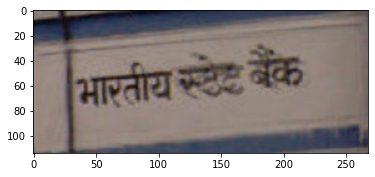

['भारतीय स्डेड बैंक']
Distance 7842.294817207525
1804 9216 360 12.6786
0 26.920921239103937 75.82167807100437 shop_hoarding ['भारतीय स्डेड बैंक'] Track_A-Ladybug-1334.jpg
5 shop_hoarding


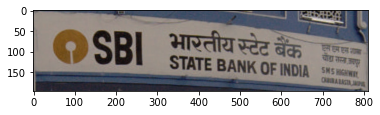

['SB| भारतीय स्टेट बैंक खर नायरम गान STATE BANK OF INDIA 545 गमउर OuWARN:n " KrHHIL']
Distance 6854.632448206104
2935 9216 360 12.6786
0 26.921012141370667 75.82172521401402 shop_hoarding ['SB| भारतीय स्टेट बैंक खर नायरम गान STATE BANK OF INDIA 545 गमउर OuWARN:n " KrHHIL'] Track_A-Ladybug-1334.jpg
4 shop_hoarding


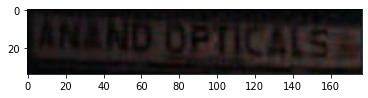

  3%|████▏                                                                                                                              | 1/31 [00:36<18:11, 36.38s/it]

['7100 031915']
Distance 3571.5430838784514
6504 9216 360 12.6786
0 26.920945135906194 75.82197527085641 shop_hoarding ['7100 031915'] Track_A-Ladybug-1334.jpg
9 shop_hoarding


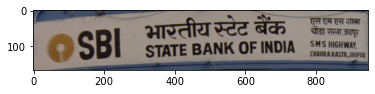

['भारतीय स्टेट बैंक एस एम एन शाच् चौडा रास्ना नवपुर SB| STATE BANK OF INDIA SMS HIGHWAY CHAURA RASTA JAIPUR']
Distance 7482.455278850653
2247 9216 360 13.4661
0 26.921006375380497 75.8216995973794 shop_hoarding ['भारतीय स्टेट बैंक एस एम एन शाच् चौडा रास्ना नवपुर SB| STATE BANK OF INDIA SMS HIGHWAY CHAURA RASTA JAIPUR'] Track_A-Ladybug-1335.jpg
4 shop_hoarding


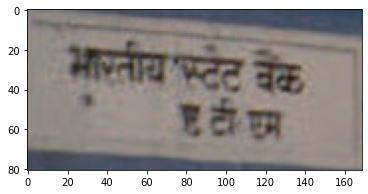

['आातीग स्टंट नढ रट स']
Distance 6420.884829990334
3315 9216 360 13.4661
0 26.921072315728303 75.82176823894173 shop_hoarding ['आातीग स्टंट नढ रट स'] Track_A-Ladybug-1335.jpg
5 shop_hoarding


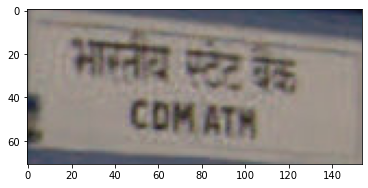

['नान२ सग् COHBTA']
Distance 6223.594218777442
3521 9216 360 13.4661
0 26.921077971581866 75.82178538564574 shop_hoarding ['नान२ सग् COHBTA'] Track_A-Ladybug-1335.jpg
4 shop_hoarding


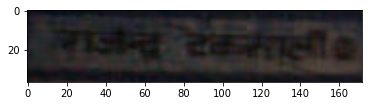

  6%|████████▍                                                                                                                          | 2/31 [01:11<17:20, 35.87s/it]

[]
Distance 3046.3844143508877
7269 9216 360 13.4661
0 26.920930749732268 75.82195345596914 shop_hoarding [] Track_A-Ladybug-1335.jpg
6 shop_hoarding


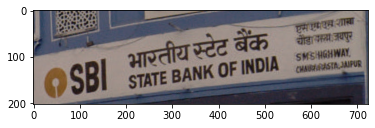

In [ ]:
import os, json
from tqdm import tqdm
import itertools 
from matplotlib import pyplot as plt
import cv2
import math
#dir_names = ['train', 'test']
dir_names = ['C:/Users/Raja/Downloads/Jaipur_SHOP_JSONS/']
import easyocr
reader = easyocr.Reader(["en",'hi'], gpu = False)
ext = 'json'



kml_src = 'D:/Genesys/seg_bin/Track_A01.csv'
lat_value = {}
lon_value = {}
center_bearing_value = {}

kml_file = open(kml_src, 'r')
line_num = 0
for line in kml_file:
    if line_num == 0:
        line_num = line_num+1
        continue
    else:
        line = (line.split(','))
        # print (line)
        lat_value[line[0]] = float(line[3])
        lon_value[line[0]]  = float(line[2])
        center_bearing_value[line[0]] = float(line[5])

def CalculatelatlonfromBearing(inputLat, inputLon,  bearing, depth):
    
    depthiKM = depth/1000
    
    earthDistance = depthiKM/6371.01
    brng = math.radians(bearing)

    inputLat = math.radians(inputLat)
    inputLon = math.radians(inputLon)

    lat2 = math.asin(math.sin(inputLat)*math.cos(earthDistance) + math.cos(inputLat)*math.sin(earthDistance)*math.cos(brng))
    lon2 = inputLon + math.atan2(math.sin(brng)*math.sin(earthDistance)*math.cos(inputLat),math.cos(earthDistance)-math.sin(inputLat)*math.sin(lat2))

    lon2 = math.fmod((lon2+3*math.pi),(2*math.pi)) - math.pi

    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)

    return lat2,lon2

def CalculateBearingfromFOV(targetPixelX, imageWidth, fov, centerBearing):
    centerPixel = imageWidth/2
    #pixelbearingRatio = 360/imageWidthPixels #1 pixel = ? heading for spherical views
    pixelbearingRatio = fov/imageWidth #for DSLRs/ Drones
    pixelDiff = targetPixelX - centerPixel
    differenceBearing = pixelDiff*pixelbearingRatio
    targetBearing =centerBearing + differenceBearing
    return targetBearing

    
    
def json_path_to_dic(json_path):
    dic = None
    with open(json_path, 'rb') as fp:
        dic = json.load(fp)
    return dic


def apply_ocr_create_csv(dic, thing_class_counts, csv_write):
    
    for shape_dic in dic['shapes']:
        print (len(shape_dic['points']), shape_dic['label'])
        # print (shape_dic['points'])
        imagePath = dir_names[0]+ dic['imagePath']
        image_id = dic['imagePath'].split('.')[0].split('-')[-1]
        img = cv2.imread(imagePath)
        x_min, x_max, y_min ,y_max =  extract_corner_points(shape_dic['points'])
        plt.imshow(img[y_min:y_max, x_min:x_max, :])
        plt.show()
        output = reader.readtext(img[y_min:y_max, x_min:x_max, :], detail = 0, paragraph=True)
        print (output)
        targetPixelX =  int((x_max+x_min)/2)
        targetPixelY = int(y_min)
        diffX, diffY = abs(targetPixelX- 9216), abs(targetPixelY- 4608)

        distance = math.sqrt(diffX**2 + diffY**2)

        print ("Distance", distance)
        if diffX < 1000:
            factor = 0.15
        if diffX < 1400:
            factor = 0.40
        else:
            factor  = 0.2 #ACTUAL_ASSET_DIM[thing_classes[x[0]['predClasses'][num]]] /10
            if targetPixelX > 4608:
                factor = 0.4

        depth = int(distance / 100)* factor 
        centerBearing = center_bearing_value[image_id]# scrape value from kml file
        fov = 360 # fixed
        imageWidth = 9216
        print (targetPixelX, imageWidth, fov, centerBearing)
        bearing  = CalculateBearingfromFOV(targetPixelX, imageWidth, fov, centerBearing)
        
        inputLat , inputLon = lat_value[image_id], lon_value[image_id]# scrape value from kml file
        lat, lon = CalculatelatlonfromBearing(inputLat, inputLon,  bearing, depth)
        # content to write in csv file id,lat,lon,Object,Score,ImageName
        print (feat_id, lat,lon, shape_dic['label'], str(output), dic['imagePath'])
        csv_str = '{},{},{},{},{},{}\n'.format(feat_id, lat,lon, shape_dic['label'], ','.join(output), dic['imagePath'])
        csv_write.write(csv_str)

        if shape_dic['label'] not in thing_class_counts:
            thing_class_counts[shape_dic['label']] = 0
        thing_class_counts[shape_dic['label']] += 1

    return thing_class_counts

def compare_json_and_img_name(img_file_name, json_file_name, json_path):
    json_name = json_file_name.split('.')[0]
    img_name = img_file_name.split('.')[0]

    if json_name != img_name:
        print(f"[CRITICAL WARNING] {json_path} has different image name {img_file_name}")
    
def extract_corner_points(points):
    x_min = 1000000
    x_max = 0
    y_min = 1000000
    y_max= 0
    
    for point in points:
        point = list(map(int, point))
        if point[0] > x_max:
            x_max= point[0]
        if point[1] > y_max:
            y_max= point[1]
        if point[0] < x_min:
            x_min = point[0]
        if point[1] < y_min:
            y_min = point[1]
    return x_min, x_max, y_min ,y_max


thing_class_distribution = {}
csv_write = open('Vector_all_24.csv', 'w', encoding="utf-8")
csv_write.write('id,lat,lon,Object,Output,ImageName\n')

for dir_name in dir_names:

    print(f'working on {dir_name} dir ...')
    for json_file_name in tqdm([f for f in os.listdir(dir_name) if f.split('.')[-1].lower() == ext.lower()]):
        try:
            path = f'{dir_name}/{json_file_name}'
            json_dic = json_path_to_dic(path)
            feat_id = 0
            thing_class_distribution = apply_ocr_create_csv(
                dic=json_dic, 
                thing_class_counts=thing_class_distribution,
                csv_write=csv_write)

            compare_json_and_img_name(
                img_file_name=json_dic['imagePath'], 
                json_file_name=json_file_name,
                json_path=path
                )
        except Exception as E:
            
            print ("#"*80)
            print (json_file_name)
            print (E)
            print ("#"*80)

csv_write.close()
            

In [ ]:
# distibution
list(thing_class_distribution.keys()), len(list(thing_class_distribution.keys()))


In [ ]:
# sorted
sorted_classes = sorted(thing_class_distribution, key=thing_class_distribution.get)
for k in sorted_classes:
    print(k, ':' ,thing_class_distribution[k])

In [ ]:
len(sorted_classes)